# Data loading and visualization

In [1]:
import JupyterNotebooksLib as slicernb

# Set image viewer size to 50% (fill half of a cell)
slicernb.AppWindow.setWindowSize(scale=0.5)
# Hide patient information from slice view
slicernb.showSliceViewAnnotations(False)

## 3D volume display

In [2]:
# Clear scene
slicer.mrmlScene.Clear(False)

# Load a Slicer sample data set
import SampleData
volume = SampleData.SampleDataLogic().downloadMRBrainTumor1()

print("Volume size: {0}".format(volume.GetImageData().GetDimensions()))

Volume size: (256, 256, 112)

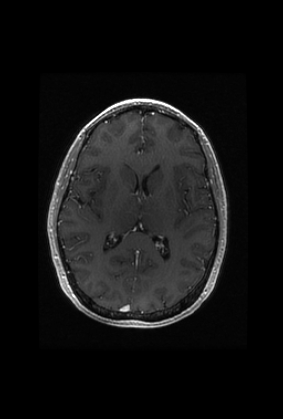

In [3]:
# Show slice view
slicernb.ViewDisplay("OneUpRedSlice")

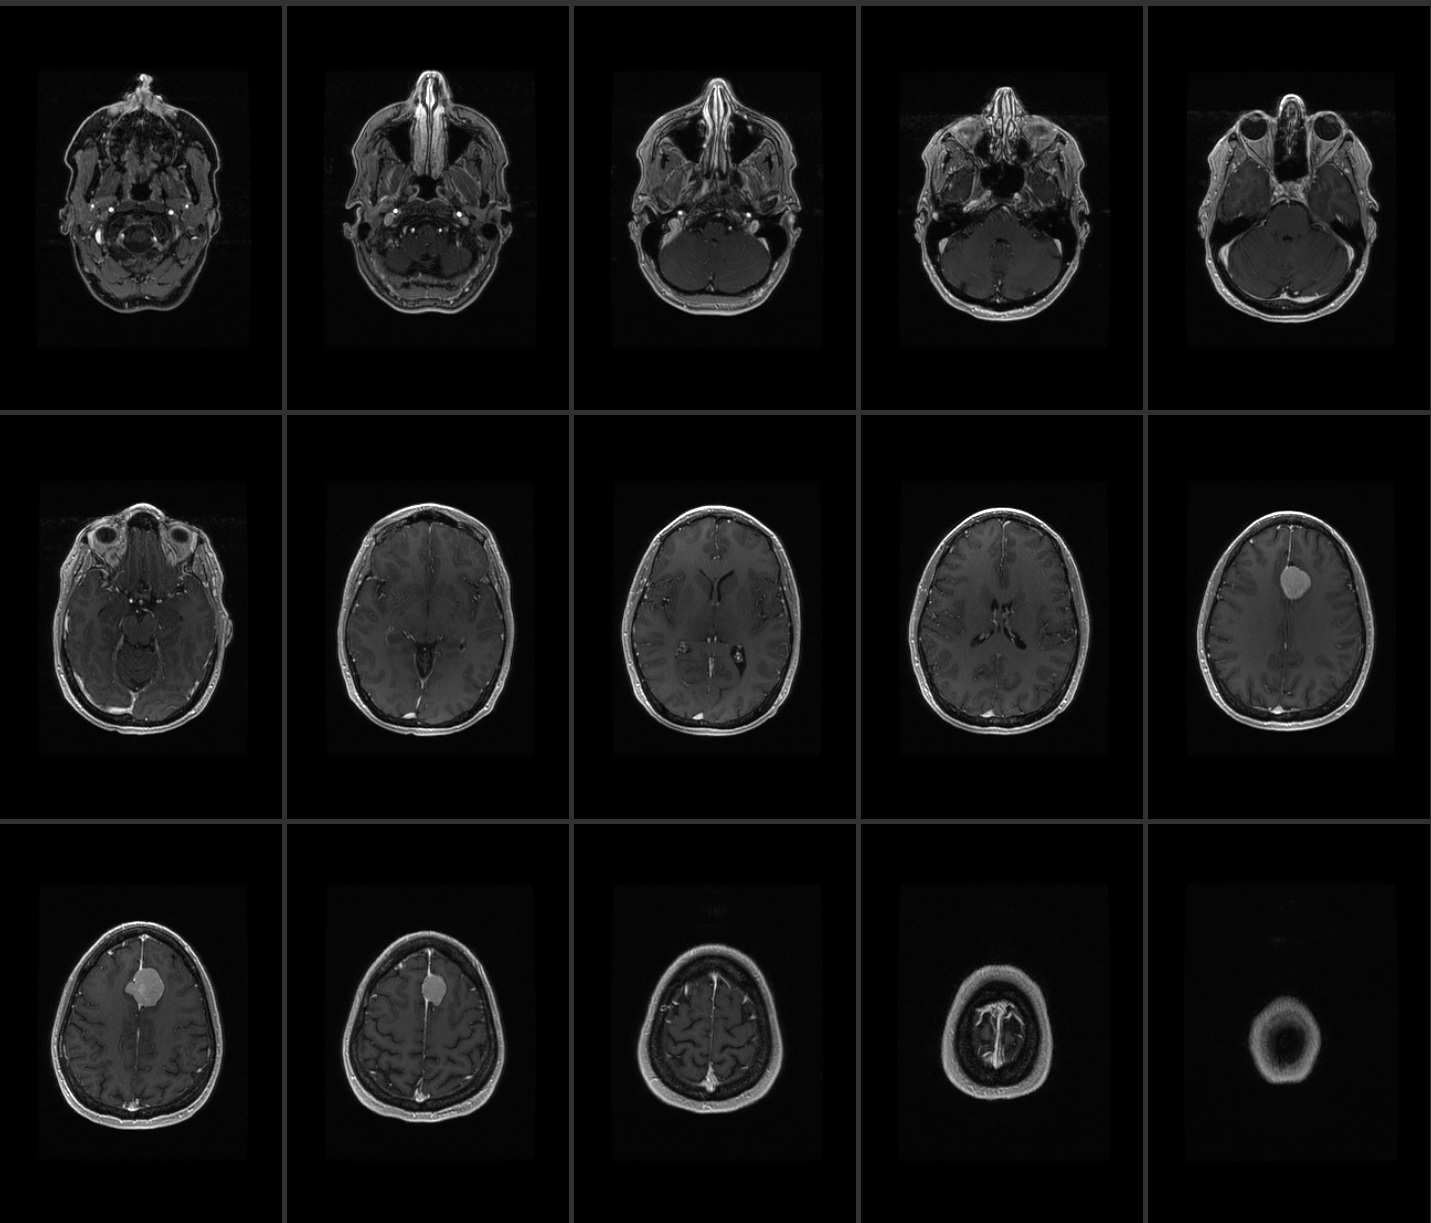

In [4]:
# Lightbox view
slicernb.ViewLightboxDisplay("Red", columns=5, rows=3, rangeShrink=[45,50])

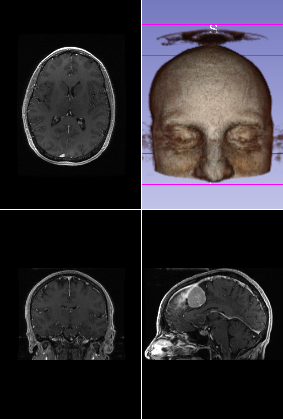

In [5]:
# Enable 3D volume rendering
slicernb.showVolumeRendering(volume)

# Show slice and 3D views
slicernb.ViewDisplay("FourUp")  # You can also try: FourUp, OneUpRedSlice, OneUp3D

## Dynamic views - Level 1. View objects + standard widgets
- Displayed content is saved in the notebook
- Views cannot be placed in a layout
- Low update rate (only for small adjustment of view parameters)
- Mouse and keyboard events are not captured

In [6]:
# Slice view display
from ipywidgets import interact
@interact(position=(0,100))
def update(position=50):
    return slicernb.ViewSliceDisplay('Red', positionPercent=position)

interactive(children=(IntSlider(value=50, description='position'), Output()), _dom_classes=('widget-interact',…

In [7]:
# Enable volume cropping
displayNode = slicer.modules.volumerendering.logic().GetFirstVolumeRenderingDisplayNode(volume)
displayNode.SetCroppingEnabled(True)
roiNode = displayNode.GetROINode()

# 3D view display
slicernb.reset3DView()
from ipywidgets import interact
@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-180.0,180.0,5), cropx=(0,70,5), cropy=(0,120,5), cropz=(0, 80, 5))
def update(roll=0, pitch=0, yaw=0, cropx=70, cropy=120, cropz=80):
    roiNode.SetRadiusXYZ([cropx, cropy, cropz])
    return slicernb.View3DDisplay(0, orientation=[roll, pitch, yaw])

interactive(children=(FloatSlider(value=0.0, description='roll', max=90.0, min=-90.0, step=5.0), FloatSlider(v…

## Dynamic views - Level 2. View widgets
- Widgets can be placed in a layout
- Widget state (displayed content) is not saved in the notebook by default
- Low update rate (only for small adjustment of view parameters)
- Mouse and keyboard events are not captured

In [8]:
# Slice widgets
from ipywidgets import HBox
display(HBox([slicernb.ViewSliceWidget('Red'), slicernb.ViewSliceWidget('Yellow'), slicernb.ViewSliceWidget('Green')]))

In [9]:
# 3D widget
display(HBox([slicernb.ViewSliceBaseWidget('Red', width="40%"), slicernb.View3DWidget(0, width="40%")]))

## Dynamic views - Level 3. Interactive view widgets
- Some view controlling mouse and keyboard events are captured
- Only selected view can be displayed and controlled
- Medium update rate (somewhat usable on remote computers)

In [10]:
# Adjust maximum rate of Slicer's Jupyter kernel consuming Jupyter messages.
# Lower values make the notebook more responsive but too low values may make the Slicer application
# slow to respond.
slicer.modules.jupyterkernel.setPollIntervalSec(0.001)

# 3D view
slicernb.AppWindow.setWindowSize(scale=0.5)
live3d = slicernb.ViewInteractiveWidget('1')
live3d.trackMouseMove = True
display(live3d)

ViewInteractiveWidget(height=194, width=153)

In [11]:
# Slice view (use arrow keys to move between slices, right-click-and-drag to zoom in/out)
liveRedSlice = slicernb.ViewInteractiveWidget('R')
liveRedSlice.trackMouseMove = True
display(liveRedSlice)

ViewInteractiveWidget(height=194, width=153)